In [67]:
!pip install scikit-spatial

https://scikit-spatial.readthedocs.io/en/stable/gallery/index.html

In [68]:
from scipy.linalg import orth
from sympy.matrices import Matrix
import sympy
import numpy as np
from sympy import init_printing
init_printing()


from skspatial.objects import Plane
from skspatial.objects import Point
from skspatial.objects import Vector
from skspatial.plotting import plot_3d


In [69]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

In [70]:
v1 = np.array([1, 0, 3])
v2 = np.array([-2, 1, 0])
v3 = np.array([0, -1, 1])

a1 = np.copy(v1)
a2 = v2 - (np.dot(v2, a1) / np.linalg.norm(a1)**2)*a1
a3 = v3 - (np.dot(v3, a1) / np.linalg.norm(a1)**2)*a1 - (np.dot(v3, a2) / np.linalg.norm(a2)**2)*a2

[1 0 3] [-2  1  0]


Text(0.0, -1.4, 'v3')

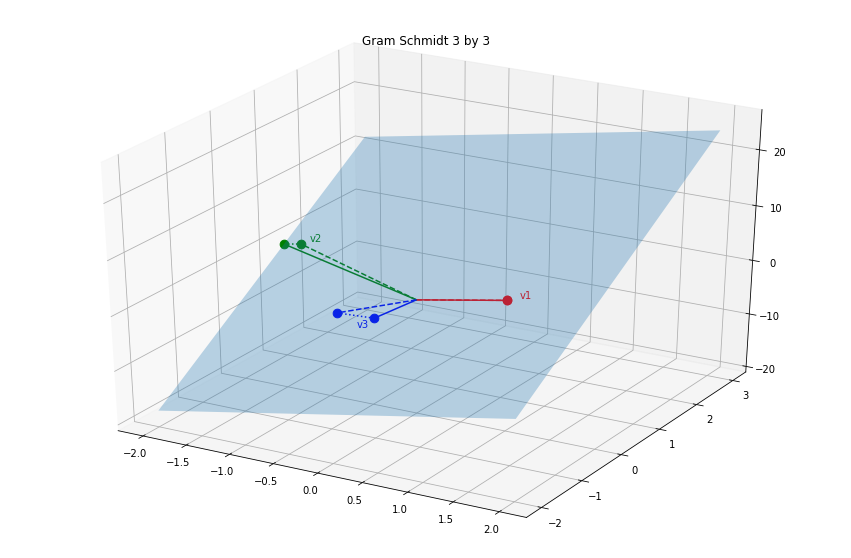

In [71]:
vector1 = Vector(v1)
vector2 = Vector(v2)
vector3 = Vector(v3)

vector4 = Vector(a1)
vector5 = Vector(a2)
vector6 = Vector(a3)

point1 = Point(vector1)
point2 = Point(vector2)
point3 = Point(vector3)
point4 = Point(vector4)
point5 = Point(vector5)
point6 = Point(vector6)

vector_projection1 = Vector.from_points(point1, point4)
vector_projection2 = Vector.from_points(point2, point5)
vector_projection3 = Vector.from_points(point3, point6)

point_a, point_b, point_c = [0, 0, 0], point1, point2

print(point_b, point_c)

plane = Plane.from_points(point_a, point_b, point_c)

_, ax = plot_3d(

    plane.plotter(lims_x=(-2, 2), lims_y=(-2, 3), alpha=0.3),

    vector1.plotter(color='r'),
    vector2.plotter(color='g'),
    vector3.plotter(color='b'),
    vector4.plotter(color='r', linestyle='--'),
    vector5.plotter(color='g', linestyle='--'),
    vector6.plotter(color='b', linestyle='--'),

    point1.plotter(s=75, c='r'),
    point2.plotter(s=75, c='g'),
    point3.plotter(s=75, c='b'),
    point4.plotter(s=75, c='r'),
    point5.plotter(s=75, c='g'),
    point6.plotter(s=75, c='b'),

    vector_projection1.plotter(point=point1, c='r', linestyle='dotted'),
    vector_projection2.plotter(point=point2, c='g', linestyle='dotted'),
    vector_projection3.plotter(point=point3, c='b', linestyle='dotted'),

)
# ax.view_init(30, 30)

# ax.set_zlim([-3, 1])
ax
ax.set_title("Gram Schmidt 3 by 3")
ax.text(*(v1+0.1), 'v1', c="r")
ax.text(*(v2+0.2), 'v2', c="g")

vb = v3[::]
vb = vb.astype("float64")
vb[1] -= 0.4

ax.text(*vb, 'v3', c="b")